[La base de datos](#P0)

[Selecciones de las variables pertinentes para hacer la prediccion](#P2)
* [Estudio de las correlaciones entre variables](#P21)
* [Reduccion de las variables: ACP](#P22)

[Implementacion de los differentes modelos](#P3)
* [Separacion en base de aprentizaje y base de prueba](#P41)
* [Los modelos](#P42)
* * [Ridge Regression](#P421)
* * [Logistic Regression](#P422)
* * [Elastic Net](#P423)
* * [Bayesian Ridge](#P424)
* * [KNN](#P425)
* * [SVM](#P426)
* * [Neural Network](#P427)
* * [DecisionTreeRegressor](#P428)
* * [RF Regressor](#P429)
* [Importancia de las differentes variables en la construccion del modelo](#P43)

[Comparacion de los modelos](#P5)
* [Curva ROC](#P51)
* [Funciones utiles para comparar los modelos](#P52)
* [Tassas de error y limpieza de la lista PNB](#P53)


# La base de datos

Base mas completa (14 variables) pero los resultados estan menos buen que con la base de Gerana. A lo mejor, hay que ver con el muestra de observaciones.

In [1]:
%pylab inline
import pyensae
import pandas, urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import neighbors
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from pydoc import help
from scipy.stats.stats import pearsonr, spearmanr
from random import randrange

Populating the interactive namespace from numpy and matplotlib


In [2]:
t3=time.clock()

# Seleccion y vectorizacion de las variables pertinentes para hacer la prediccion

In [3]:
#Importamos la base completa
base_c=r'/Users/gillescornec/Desktop/Bases_QV/base_complete.csv'
df_base_c = pandas.read_csv(base_c, sep=';')
df_base=df_base_c.set_index("destination")
df_base.head()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Client,from address,from domain,destination user,has only words,has special chars,destination domain,attachments,has attachments,...,status_name,created,bounce detail,num_dominio,num_client,num_words,num_chars,attach,num_from,bounce
destination,,,,,,,,,,,,,,,,,,,,,
jobediente@gfaralon.com,0,BAC,credomatic-informa@pa.credomatic.com,pa.credomatic.com,jobediente,Y,N,gfaralon.com,NaN,N,...,Invalid domain,08/07/2016 0:00,NaN,2149,0,1,0,0,5,1
luisanaisa@hotmail.com,1,BAC,credomatic-informa@pa.credomatic.com,pa.credomatic.com,luisanaisa,Y,N,hotmail.com,NaN,N,...,Delivered,08/06/2016 23:59,NaN,2662,0,1,0,0,5,0
cmonte30@hotmail.com,2,BAC,credomatic-informa@pa.credomatic.com,pa.credomatic.com,cmonte30,N,N,hotmail.com,NaN,N,...,Viewed,08/06/2016 23:59,NaN,2662,0,0,0,0,5,0
roderick@mcgowensa.com,3,BAC,credomatic-informa@pa.credomatic.com,pa.credomatic.com,roderick,Y,N,mcgowensa.com,NaN,N,...,Viewed,08/06/2016 23:59,NaN,3457,0,1,0,0,5,0
manuelguevara@gmail.com,4,BAC,credomatic-informa@pa.credomatic.com,pa.credomatic.com,manuelguevara,Y,N,gmail.com,NaN,N,...,Delivered,08/06/2016 23:59,NaN,2209,0,1,0,0,5,0


In [4]:
def vectorisation(df_columna):

    l=[]
    for i in df_columna:
        if i not in l:
            l.append(i)

    dico={}
    for i in range(len(l)):
        dico[l[i]]=i
    
    num_dom=[]
    for i in df_columna:
        num_dom.append(dico[i])
    
    return(num_dom, dico)

In [5]:
def df_vectorisé(base,liste_variable):
    
    #var_name=["destination domain","Client","from domain","has attachments", "has only words", "has special chars"]
    l_vect=[]
    var_dic=[]
    
    for i in liste_variable:
        l_vect.append(pandas.DataFrame(vectorisation(base[i])[0],columns=[i]))
        var_dic.append(vectorisation(base[i])[1])
    #df_vect=pandas.concat(l_vect, axis=1)
    
    return (pandas.concat(l_vect, axis=1), var_dic)



In [6]:
var_name=["destination domain","Client","from domain","has attachments", "has only words", "has special chars"]
df_vect=df_vectorisé(df_base,var_name)

In [7]:
#Separacion inputs/target
base_inputs = df_vect[0]
base_targets= df_base["bounce"]

In [8]:
base_inputs.head()

,destination domain,Client,from domain,has attachments,has only words,has special chars
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,1,0
3,2,0,0,0,0,0
4,3,0,0,0,0,0


# Implementacion de los diferentes modelos

Logistic regression / Random forest / Neural network

## Separacion en base de aprentizaje y base de prueba

Separamos el base en un base de aprentizaje y un base de prueba

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(base_inputs, base_targets, test_size=0.25)
print(X_train.shape, y_train.shape)
y_test.head()

(91427, 6) (91427,)


destination
monica.alexandra@hotmail.com    0
renato-mejia@hotmail.com        0
josemanuelrivas@live.com        0
mpolanco29@gmail.com            0
pty6688@gmail.com               0
Name: bounce, dtype: int64

In [10]:
type(y_test)

pandas.core.series.Series

In [11]:
y_test[1]

0

## Los modelos

### Ridge Regression

Para utilizar un modelo de regression logistic, debemos tener variables numericas repartidas en categorias.

In [12]:
#tiempo de calcul: algunos segundos
logistic = linear_model.Ridge(alpha=10.0)
logit=logistic.fit(X_train,y_train)
y_pred_Ridge=logit.predict(X_test)
y_pred_Ridge

array([ 0.31238697,  0.19308127,  0.32235729, ...,  0.19418217,
        0.48794771,  0.5984426 ])

### Logistic regression (logit)

In [13]:
#algunos segundos
LR = linear_model.LogisticRegression()
LR_fit=LR.fit(X_train,y_train)
y_pred_LR=LR_fit.predict(X_test)
y_pred_LR

array([0, 0, 0, ..., 0, 1, 1])

###  Lasso

In [14]:
Lasso = linear_model.Lasso(alpha = 0.1)
Lasso_fit=logistic.fit(X_train,y_train)
y_pred_lasso=Lasso_fit.predict(X_test)
y_pred_lasso

array([ 0.31238697,  0.19308127,  0.32235729, ...,  0.19418217,
        0.48794771,  0.5984426 ])

### Elastic Net

In [15]:
EN = linear_model.ElasticNet(alpha=0.1)
EN_fit=EN.fit(X_train,y_train)
y_pred_EN=EN_fit.predict(X_test)
y_pred_EN

array([ 0.27543182,  0.19995909,  0.28479877, ...,  0.20010777,
        0.42637727,  0.57821482])

###  Bayesian Ridge

In [16]:
BR = linear_model.BayesianRidge()
BR_fit=BR.fit(X_train,y_train)
y_pred_BR=BR_fit.predict(X_test)
y_pred_BR

array([ 0.31211286,  0.19296936,  0.32208626, ...,  0.19407811,
        0.48767079,  0.59846016])

### KNN

In [17]:
#9s
KNN= neighbors.KNeighborsRegressor()
KNN_fit=KNN.fit(X_train,y_train)
y_pred_KNN=KNN_fit.predict(X_test)
y_pred_KNN

array([ 0.2,  0.4,  0.2, ...,  0.2,  1. ,  0.6])

### SVM

In [18]:
#1min
SVM= svm.LinearSVR()
SVM_fit=SVM.fit(X_train,y_train)
y_pred_SVM=SVM_fit.predict(X_test)
y_pred_SVM

array([ 0.00430943,  0.0034668 ,  0.04335914, ...,  0.00246808,
        0.3378812 ,  1.01214913])

### Neural Network

In [19]:
X_train_1=X_train.as_matrix()
y_train_1=y_train.as_matrix()
print(type(y_train_1))

<class 'numpy.ndarray'>


In [20]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using Theano backend.


In [21]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=6, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

In [22]:
#compile model
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])

In [23]:
#2min
# Fit the model
model.fit(X_train_1, y_train_1, nb_epoch=5, batch_size=10)

Epoch 1/5
91427/91427 [==============================] - 7s - loss: 0.1894 - acc: 0.7017     
Epoch 2/5
91427/91427 [==============================] - 7s - loss: 0.1794 - acc: 0.7361     
Epoch 3/5
91427/91427 [==============================] - 7s - loss: 0.1775 - acc: 0.7428     
Epoch 4/5
91427/91427 [==============================] - 7s - loss: 0.1771 - acc: 0.7431     
Epoch 5/5
91427/91427 [==============================] - 7s - loss: 0.1775 - acc: 0.7436     


In [24]:
X_test_1=X_test.as_matrix()
y_test_1=y_test.as_matrix()
y_pred_NN=model.predict(X_test_1)

### DecisionTreeRegressor

In [25]:
from sklearn import tree

DTR=tree.DecisionTreeRegressor()
DTR_fit=DTR.fit(X_train,y_train)
y_pred_DTR=DTR_fit.predict(X_test)
y_pred_DTR

array([ 0.33027523,  0.1987526 ,  0.23076923, ...,  0.08446456,
        0.63270777,  0.5       ])

### RF regressor

In [26]:
RF_regressor = ensemble.RandomForestRegressor(oob_score=True)
RF_regressor_fit=RF_regressor.fit(X_train,y_train)
out_of_bag_prediction_for_X_train=RF_regressor.oob_prediction_
print(out_of_bag_prediction_for_X_train)

[ 0.66663975  0.35996169  0.48123883 ...,  0.8         0.09948057
  0.26506865]


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [27]:
y_pred_RF=RF_regressor.predict(X_test)
y_pred_RF

array([ 0.32855767,  0.1988384 ,  0.21636384, ...,  0.08398205,
        0.63200679,  0.50003503])

## Importancia de los differentes variables en la construccion del modelo

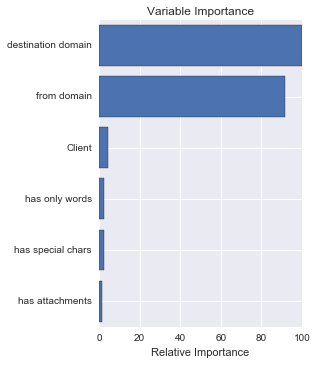

In [28]:
feature_name = base_inputs.columns
limit = 20
feature_importance = RF_regressor_fit.feature_importances_[:20]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_name[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

# Comparacion de los modelos

## Curva ROC

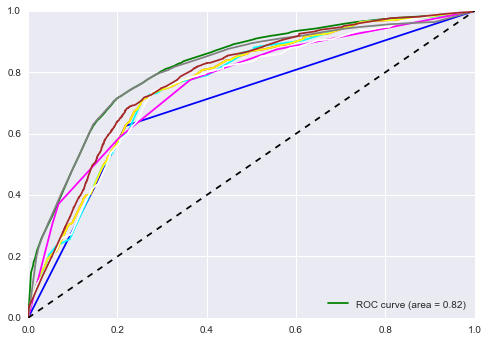

In [29]:
fpr_logit_lm, tpr_logit_lm, _ = metrics.roc_curve(y_test, y_pred_LR)
fpr_RF_lm, tpr_RF_lm, _ = metrics.roc_curve(y_test, y_pred_RF)
fpr_lasso_lm, tpr_lasso_lm, _ = metrics.roc_curve(y_test, y_pred_lasso)
fpr_EN_lm, tpr_EN_lm, _ = metrics.roc_curve(y_test, y_pred_EN)
fpr_BR_lm, tpr_BR_lm, _ = metrics.roc_curve(y_test, y_pred_BR)
fpr_KNN_lm, tpr_KNN_lm, _ = metrics.roc_curve(y_test, y_pred_KNN)
fpr_SVM_lm, tpr_SVM_lm, _ = metrics.roc_curve(y_test, y_pred_SVM)
fpr_DTR_lm, tpr_DTR_lm, _ = metrics.roc_curve(y_test, y_pred_DTR)
fpr_NN_lm, tpr_NN_lm, _ =metrics.roc_curve(y_test_1,y_pred_NN)

roc_auc = auc(fpr_RF_lm, tpr_RF_lm)

plt.plot(fpr_logit_lm, tpr_logit_lm, color='blue')
plt.plot(fpr_RF_lm,tpr_RF_lm, color='green',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_lasso_lm,tpr_lasso_lm, color='red')
plt.plot(fpr_EN_lm,tpr_EN_lm, color='cyan')
plt.plot(fpr_BR_lm,tpr_BR_lm, color='yellow')
plt.plot(fpr_KNN_lm,tpr_KNN_lm, color='magenta')
plt.plot(fpr_SVM_lm,tpr_SVM_lm, color='white')
plt.plot(fpr_DTR_lm,tpr_DTR_lm, color='gray')
plt.plot(fpr_NN_lm, tpr_NN_lm, color='brown')

plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")

El modelo que tiene la mas grande area abajo de su curva es el mejor. Por eso, RF parece el mejor modelo.

Preciso, solidez y tiempo de computado (calibrado y prueba)

## Funciones utiles para comparar los modelos

In [30]:
#attencion no significa la misma cosa en funcion de la columna (test o pred)
def porcentaje_0(columna):
    p=0
    for i in range(len(columna)):
        if columna[i]==0:
            p=p+1
    return (p/len(columna))

In [31]:
# % de 1 en los NB
def FP(columna_test,columna_pred):
    l=0
    p=0
    for i in range(len(columna_test)):
        if columna_test[i]==0:
            l=l+1
            if columna_pred[i]==1:
                p=p+1
    if l!=0:
        return p/l
    else:
        return 1

In [32]:
# % de 1 en los B
def VP(columna_test,columna_pred):
    l=0
    p=0
    for i in range(len(columna_test)):
        if columna_test[i]==1:
            l=l+1
            if columna_pred[i]==1:
                p=p+1
    if l!=0:
        return p/l
    else:
        return 1

In [33]:
#colonne muette
def attribution(columna,threshold):
    c=np.zeros(shape(columna)[0])
    for i in range(len(columna)):
        if columna[i]>= threshold:
            c[i]=1
        else:
            c[i]=0
    return c

In [34]:
# % de NB en la lista PNB
def val_pred_neg(columna_test,columna_pred):
    l=0
    p=0
    for i in range(len(columna_pred)):
        if columna_pred[i]==0:
            l=l+1
            if columna_test[i]==0:
                p=p+1
    if l!=0:
        return p/l
    else:
        return 1

In [35]:
# % de B en la lista PB (=1-%NB en la lista PB)
def val_pred_pos(columna_test,columna_pred):
    l=0
    p=0
    for i in range(len(columna_pred)):
        if columna_pred[i]==1:
            l=l+1
            if columna_test[i]==1:
                p=p+1
    if l!=0:
        return p/l
    else:
        return 1

In [36]:
def seuil(y_test,y_pred):
    threshold=[i/100 for i in range(1,100)]
    l=[]
    for i in threshold:
        #print(i)
        a=attribution(y_pred,i)
        #print(1-(VP(y_test,a)+1-FP(y_test,a))/2)
        l.append(1-(VP(y_test,a)+1-FP(y_test,a))/2)
    b=min(l)  
    s=l.index(b)/100
    #print(s)
    a=attribution(y_pred,s)
    VPN=val_pred_neg(y_test,a)
    VPP=val_pred_pos(y_test,a)
    
    return (s, VPN, VPP, b)

## Tassas de error y limpieza de la lista PNB (Predicion No Bounce)

In [37]:
y_test_1=y_test.as_matrix()

In [38]:
# !!! la columna_test debe ser un array (tambien por la columna_pred)
def cuadro_recapitulativo(columna_test,columna_pred):
    
    t=pandas.DataFrame([ {"threshold":0,"FP (% de 1 en los NB)":0,"VN (% de 0 en los NB)":0,"VP (% de 1 en los B)":0,"FN (% de 0 en los B)":0, "VPN (% de NB en la lista 0)":0,"% de B en la lista 0":0,"VPP (% de B en la lista 1)":0,"% de NB en la lista 1":0, "porcentaje de 0 predicto":0,"porcentaje de NB":0, "tassa de error de identificacion":0,"tassa de error de prediccion":0}])
    l=[]
    l.append(t)
    a=[]
    b=[]
    TLB=[]
    VPN=[]
    VPP=[]
    P_NB=porcentaje_0(columna_test)
    P_B=1-P_NB
    p=0
    threshold=[i/100 for i in range(20,70)]
    for j in threshold:
        y_pred_RF3=attribution(columna_pred,j)
        #print(y_pred_RF3)
        #print(VP(y_test_1,y_pred_RF3))
        #print(a)
        #print(VP(columna_test,y_pred_RF3))
        a.append(VP(columna_test,y_pred_RF3))
        #print(a[p])
        b.append(FP(columna_test,y_pred_RF3))
        #print(FP(y_test_1,y_pred_RF3))
        #print(b[p])
        TLB.append(porcentaje_0(y_pred_RF3))
        VPN.append((1-b[p])*P_NB/((1-b[p])*P_NB+(1-a[p])*(1-P_NB)))
        #print(VPN[p])
        VPP.append(a[p]*P_B/(a[p]*P_B+b[p]*P_NB))
    
        d=l[p].append([{"threshold":j,"FP (% de 1 en los NB)":b[p],"VN (% de 0 en los NB)":1-b[p],"VP (% de 1 en los B)":a[p],"FN (% de 0 en los B)":1-a[p], "VPN (% de NB en la lista 0)":VPN[p],"% de B en la lista 0":1-VPN[p],"VPP (% de B en la lista 1)":VPP[p],"% de NB en la lista 1":1-VPP[p], "porcentaje de 0 predicto":TLB[p],"porcentaje de NB":P_NB, "tassa de error de identificacion":(b[p]+1-a[p])/2, "tassa de error de prediccion":1-(VPP[p]+VPN[p])/2}])
        l.append(d)
            
        p=p+1
            
    b=l[p].set_index("threshold")
    c=b.drop([0])
    
    return c

In [39]:
cuadro_recapitulativo(y_test_1,y_pred_RF)

,% de B en la lista 0,% de NB en la lista 1,FN (% de 0 en los B),FP (% de 1 en los NB),VN (% de 0 en los NB),VP (% de 1 en los B),VPN (% de NB en la lista 0),VPP (% de B en la lista 1),porcentaje de 0 predicto,porcentaje de NB,tassa de error de identificacion,tassa de error de prediccion
threshold,,,,,,,,,,,,
0.20,0.119046,0.436301,0.163976,0.347795,0.652205,0.836024,0.880954,0.563699,0.481526,0.650413,0.255886,0.277674
0.21,0.121443,0.434168,0.169044,0.342700,0.657300,0.830956,0.878557,0.565832,0.486612,0.650413,0.255872,0.277806
0.22,0.122025,0.431121,0.171297,0.337554,0.662446,0.828703,0.877975,0.568879,0.490747,0.650413,0.254426,0.276573
0.23,0.123205,0.429839,0.173925,0.334729,0.665271,0.826075,0.876795,0.570161,0.493503,0.650413,0.254327,0.276522
0.24,0.124225,0.427172,0.176835,0.329936,0.670064,0.823165,0.875775,0.572828,0.497637,0.650413,0.253386,0.275699
0.25,0.124407,0.427059,0.177210,0.329634,0.670366,0.822790,0.875593,0.572941,0.497966,0.650413,0.253422,0.275733
0.26,0.127460,0.417568,0.186597,0.313440,0.686560,0.813403,0.872540,0.582432,0.511780,0.650413,0.250018,0.272514
0.27,0.128437,0.412890,0.190257,0.306074,0.693926,0.809743,0.871563,0.587110,0.517850,0.650413,0.248166,0.270664
0.28,0.128789,0.412675,0.191008,0.305519,0.694481,0.808992,0.871211,0.587325,0.518474,0.650413,0.248264,0.270732


In [40]:
#menor tassa de error de identificacion por threshold=0.35

## Cross validation (a la mano / hacerlo de manera aleatoria)

In [41]:
#no funciona a causa de la vectorization ! 
#Lo hici antes de separar las bases. Pues, esta posible que el modelo no reconoce a algunos 
#dominios y por eso que no puede dar un score preciso a los correos.
#No se a que corresponden los primeros numeros de dominio porque ya no les ha encontrado.
#Tengo que hacer la vectorization dentro de la funcion.

In [42]:
def vectorisation(df_columna):

    l=[]
    for i in df_columna:
        if i not in l:
            l.append(i)

    dico={}
    for i in range(len(l)):
        dico[l[i]]=i
    
    num_dom=[]
    for i in df_columna:
        num_dom.append(dico[i])
    
    return(num_dom, dico)

In [43]:
#Cross validation gracias a esta funciona()
def separation_base(base,longueur):
    
    indice=int(shape(base)[0]/longueur)
    print(indice)
    liste_base_train=[]
    for i in range(longueur):
        #print(i)
        #print(i*indice)
        #print((i+1)*indice)
        liste_base_train.append(base[i*indice:(i+1)*indice])
    
    base_ind=base[0:longueur*indice]

    liste_base_test=[]
    for i in range(longueur):
        liste_base_test.append(pandas.concat([base_ind[0:i*indice],base_ind[(i+1)*indice:len(base_ind)]],axis=0))
        
    return(liste_base_train,liste_base_test)
        

In [44]:
def df_vectorisé(base,liste_variable):
    
    #var_name=["destination domain","Client","from domain","has attachments", "has only words", "has special chars"]
    l_vect=[]
    for i in liste_variable:
        l_vect.append(pandas.DataFrame(vectorisation(base[i])[0],columns=[i]))
    #df_vect=pandas.concat(l_vect, axis=1)
    
    return pandas.concat(l_vect, axis=1)



In [45]:
sep=separation_base(df_base,10)

12190


In [46]:
#deberia funcionar 
se=[]
au=[]
var_name=["destination domain","Client","from domain","has attachments", "has only words", "has special chars"]


for i in range(10):

    X_train_brut=sep[1][i]
    #print(shape(X_train))
    X_test_brut=sep[0][i] 
    #print(shape(X_test))

    
    X_brut=pandas.concat([X_train_brut,X_test_brut],axis=0)
    X=df_vectorisé(X_brut,var_name)
    
    X_train=X[0:shape(X_train_brut)[0]]
    print(shape(X)[0])
    X_test=X[shape(X_train_brut)[0]:shape(X)[0]]
    
    y_train=sep[1][i]["bounce"]
    print(shape(y_train))
    y_test = sep[0][i]["bounce"]
    print(shape(y_test))
    
    RF_regressor = ensemble.RandomForestRegressor()
    RF_regressor_fit=RF_regressor.fit(X_train,y_train)
    y_pred_RF=RF_regressor.predict(X_test)
    y_test_1=y_test.as_matrix()

    fpr_RF_lm, tpr_RF_lm, _ = metrics.roc_curve(y_test_1, y_pred_RF)
    
    se.append(seuil(y_test_1,y_pred_RF))
    au.append(auc(fpr_RF_lm, tpr_RF_lm))
    print(seuil(y_test_1,y_pred_RF))
    print(auc(fpr_RF_lm, tpr_RF_lm))

#Podemos noticiar que la VPP media esta proxima de 50%. Por eso, esta difficil de explotar la PB.
#Sin embargo, la VPN media debe ser proxima de 88%. Por eso, podemos tener confianza en la PNB.
    

121900
(109710,)
(12190,)
(0.1, 0.9661037840502896, 0.11650723571253373, 0.33766025641025643)
0.716296503497
121900
(109710,)
(12190,)
(0.08, 0.9583646475274312, 0.1471916200108362, 0.3209864563261572)
0.748623320573
121900
(109710,)
(12190,)
(0.24, 0.8416543846720708, 0.5419790104947526, 0.3826339395686954)
0.635935820179
121900
(109710,)
(12190,)
(0.19, 0.9174451858913251, 0.24161267098632108, 0.35226530400362943)
0.702893141341
121900
(109710,)
(12190,)
(0.34, 0.701010101010101, 0.7441048034934498, 0.35611244654893337)
0.701984905729
121900
(109710,)
(12190,)
(0.3, 0.8285582963076452, 0.3711813526399435, 0.3717731179966568)
0.662808707172
121900
(109710,)
(12190,)
(0.89, 0.8767422793112872, 0.5474031327287716, 0.3623374373950391)
0.591303688626
121900
(109710,)
(12190,)
(0.83, 0.8660002530684551, 0.2920457196174481, 0.3678702258382245)
0.665843618209
121900
(109710,)
(12190,)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/metrics/ranking.py:526: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


(0.0, 1, 1.0, 0.502994257588187)
nan
121900
(109710,)
(12190,)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/metrics/ranking.py:526: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


(0.0, 1, 1.0, 0.5033223954060706)
nan


In [47]:
len(se)

10

In [48]:
te=0
au1=0
for i in range(len(se)):
    te=te+se[i][3]
    print(te)
    au1=au1+au[i]
print(te/len(se))
print(au1/len(se))
    
    

0.33766025641025643
0.6586467127364136
1.041280652305109
1.3935459563087385
1.7496584028576718
2.121431520854329
2.483768958249368
2.8516391840875923
3.3546334416757793
3.8579558370818496
0.38579558370818495
nan


In [49]:
#la cross validacion esta un poco extrana porque la columna bounce no tiene al menos una vez
#un 1 o un 0 en cada muestras.

In [50]:
t4=time.clock()
print(t4-t3)

126.902635
